# Synthetic data testing

## Setup

In [ ]:
%matplotlib widget
import numpy as np
import matplotlib.pyplot as plt

In [2]:
yy, xx = np.mgrid[-2*np.pi:2*np.pi:149j, -2*np.pi:2*np.pi:149j]

In [58]:
theta = np.pi/3
scale = 2
z = np.cos((xx * np.sin(theta) + yy * np.cos(theta))*scale)

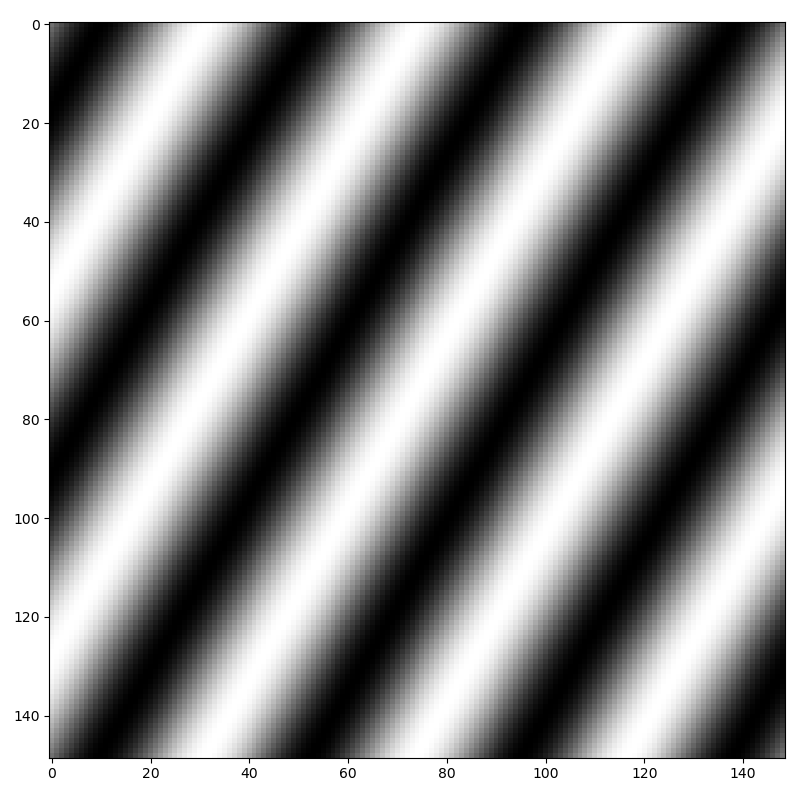

In [64]:
F, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.imshow(z, cmap='gray')
F.tight_layout()

## FRT Testing

In [60]:
from frat import frt

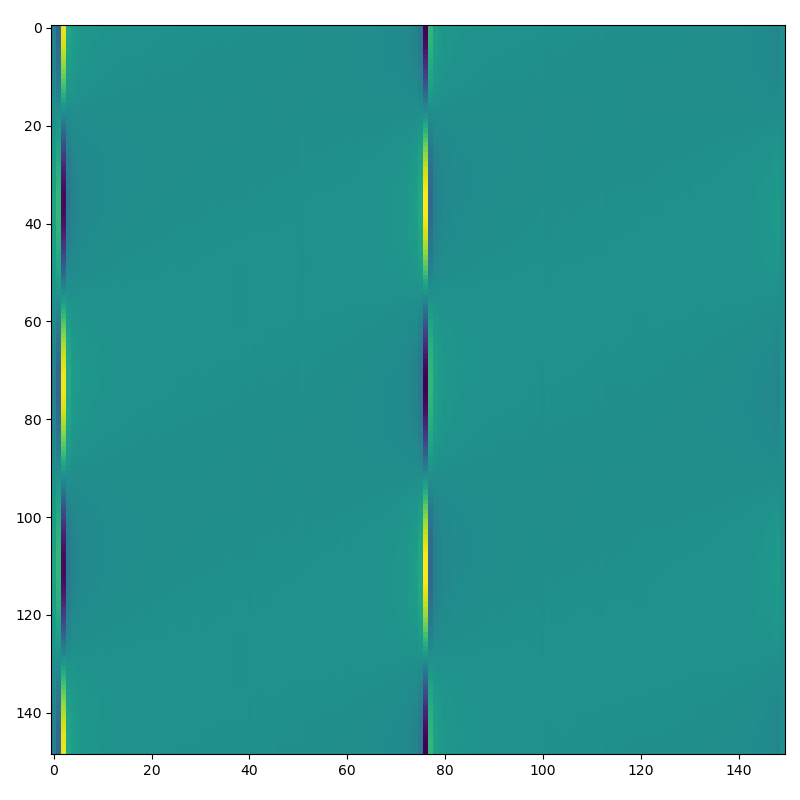

In [61]:
syn_frt = frt()
frt_sino = syn_frt.fit_transform(z)

F, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.imshow(frt_sino)
F.tight_layout()

[-3.0, 2.0]
0.982793723247329
1.0471975511965976


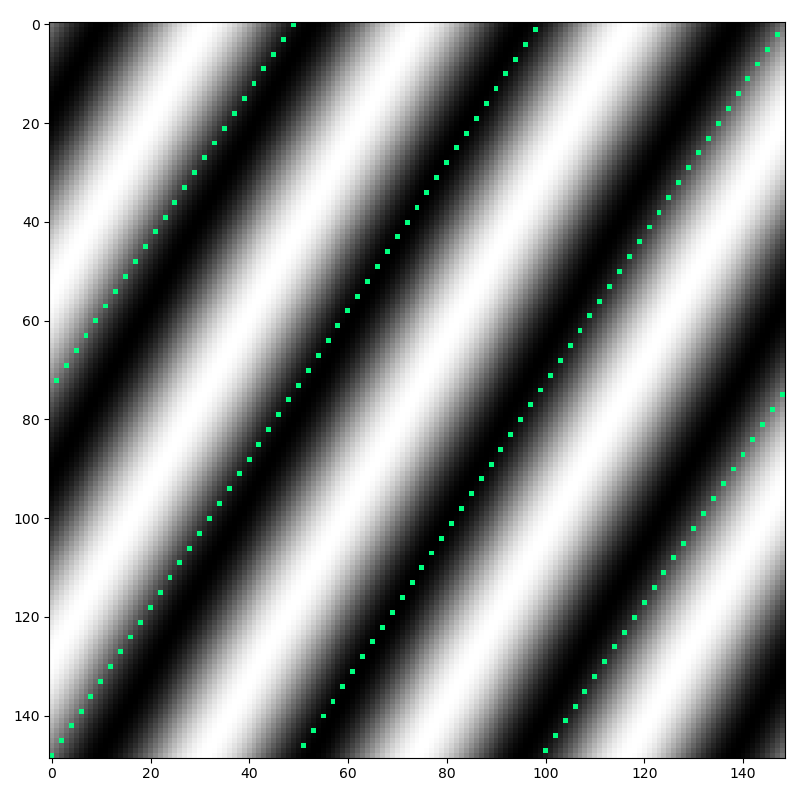

In [66]:
# For pi/3 angle with scale = 2, n_vec 2 and 76 are of interest
# For pi/3 angle with scale = 3, n_vec 101 is the primary of interest, with n_vecs 2, 51, and 52 as secondary 
check = 76
n_vec = syn_frt.n_vecs[check]
print(n_vec)
print(np.arctan(-n_vec[0]/n_vec[1]))
# print(np.pi - np.arctan(-n_vec[0]/n_vec[1]))
print(theta)

lines_ex = np.empty((149, 149))
# first_col = np.arange(149)[::-1]
first_col = np.zeros(149)
first_col[-1] = 1
if n_vec[1] != 0:
    lines_ex[:, 0] = first_col
    x_step = n_vec[1]
    y_step = -n_vec[0]
    for i in range(1, 149):
        lines_ex[:, int(i * x_step) % 149] = np.roll(first_col, -int(i * y_step) % 149)

F, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.imshow(z, cmap='gray')
ax.imshow(lines_ex, alpha=lines_ex, cmap='winter')
F.tight_layout()